EDA

In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame de pandas
file_path = 'C:/Users/HP/OneDrive - Universidad Nacional de Costa Rica/Escritorio/Dataset_analisis/All Ended Netflix Original Shows.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para inspección
data.head()



,Title,Genre,Premiere Date,Finale Date,Seasons,Cancelled
0,House of Cards,Political drama,"February 1, 2013","November 2, 2018",6,0
1,Orange Is the New Black,Comedy drama,"July 11, 2013","July 26, 2019",7,0
2,Marco Polo,Historical drama,"December 12, 2014","July 1, 2016",2,0
3,Bloodline,Thriller,"March 20, 2015","May 26, 2017",3,0
4,Daredevil,Superherolegal drama,"April 10, 2015","October 19, 2018",3,0


In [2]:
descriptive_stats = data.describe()
print(descriptive_stats)


           Seasons    Cancelled
count  1353.000000  1353.000000
mean      1.483370     0.722099
std       1.036278     0.448130
min       1.000000     0.000000
25%       1.000000     0.000000
50%       1.000000     1.000000
75%       2.000000     1.000000
max       8.000000     1.000000


In [3]:
class_counts = data['Cancelled'].value_counts()
print(class_counts)


1    977
0    376
Name: Cancelled, dtype: int64


Se va a utilizar una clasificación binaria, ya que la variable objetivo es "Cancelled," indica si un programa de televisión ha sido cancelado (1) o no (0). En este tipo de clasificación, el objetivo es predecir la pertenencia de un programa de televisión a una de las dos categorías posibles: "cancelado" o "no cancelado."

Matíz de Correlación

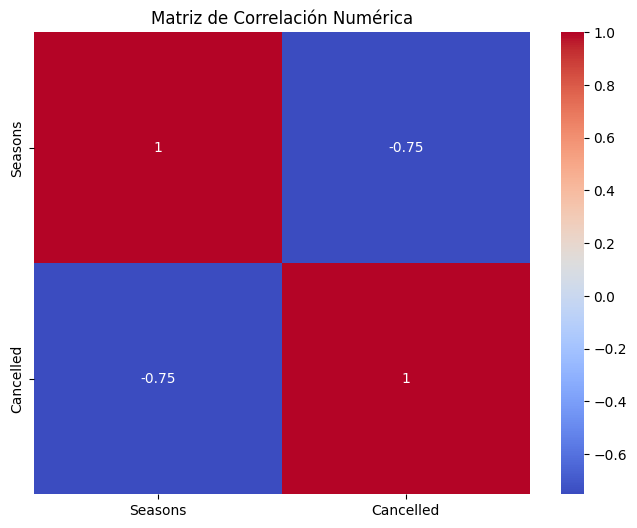

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[['Seasons', 'Cancelled']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Numérica')
plt.show()


Valor de Correlación 1 (1.0): El valor de correlación de 1.0 representa una correlación positiva perfecta entre las dos variables. Esto significa que las variables 'Seasons' y 'Cancelled' están fuertemente relacionadas en una dirección positiva. En otras palabras, a medida que la cantidad de temporadas ('Seasons') aumenta, la probabilidad de que un programa sea cancelado ('Cancelled') también aumenta. Esto sugiere que los programas con más temporadas tienden a ser cancelados con mayor frecuencia.

Valor de Correlación -0.75: El valor de correlación de -0.75 representa una correlación negativa fuerte. En este caso, sugiere que a medida que la cantidad de temporadas ('Seasons') aumenta, la probabilidad de que un programa sea cancelado ('Cancelled') disminuye. Es decir, los programas con más temporadas tienen menos probabilidades de ser cancelados. Esta relación negativa fuerte puede indicar que los programas exitosos o populares tienden a tener más temporadas y, por lo tanto, tienen menos probabilidades de ser cancelados.

Diagrama de Pareto de Géneros (Categorías Seleccionadas)

C:\Users\HP\AppData\Local\Temp\ipykernel_28336\3031260410.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_pareto, y=genre_counts, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'True crime'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Science fiction')])

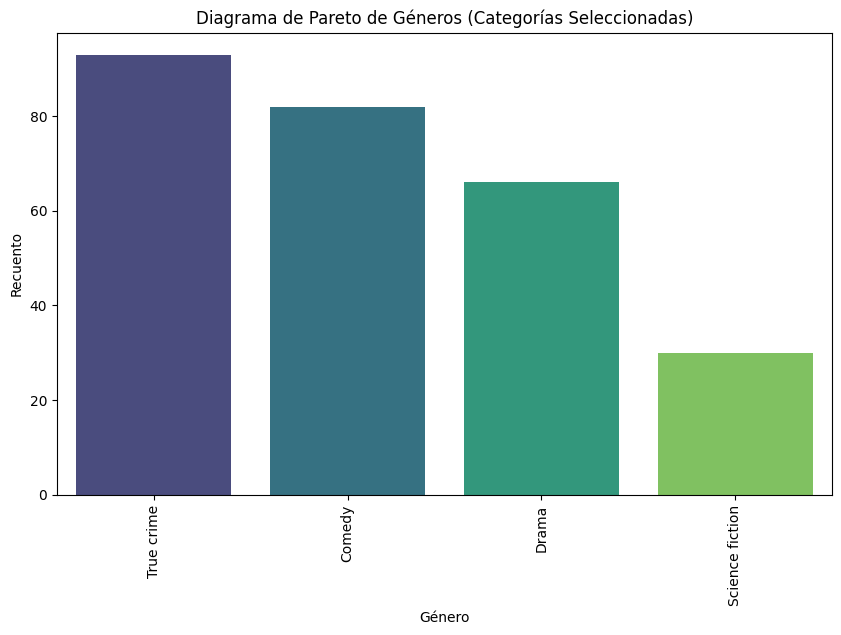

In [5]:
# Selecciona un subconjunto de categorías
categorias_a_mostrar = ['Science fiction', 'Comedy', 'Drama', 'True crime']

# Filtra los datos para incluir solo las categorías seleccionadas
data_filtrada = data[data['Genre'].isin(categorias_a_mostrar)]

# Crea el diagrama de Pareto de géneros con los datos filtrados
plt.figure(figsize=(10, 6))
genre_counts = data_filtrada['Genre'].value_counts()
genre_cumulative = genre_counts.cumsum() / genre_counts.sum()
genre_pareto = genre_counts.index
sns.barplot(x=genre_pareto, y=genre_counts, palette='viridis')
plt.xlabel('Género')
plt.ylabel('Recuento')
plt.title('Diagrama de Pareto de Géneros (Categorías Seleccionadas)')
plt.xticks(rotation=90)

Eje X (Género): En el eje horizontal, se muestran los géneros de programas de televisión seleccionados, que en este caso son 'Science fiction', 'Comedy', 'Drama' y 'True crime'. Cada barra representa uno de estos géneros.

Eje Y (Recuento): En el eje vertical, se muestra el recuento de programas de televisión que pertenecen a cada género seleccionado.

Barras del Gráfico: Cada barra representa uno de los géneros seleccionados y su altura corresponde al número de programas de televisión en ese género.

Orden Descendente: Las barras están ordenadas en orden descendente según el recuento. Esto significa que el género con el recuento más alto se encuentra en la parte izquierda del gráfico, y los géneros menos comunes están en la parte derecha.

Se seselccionaron estas categorias para ser analizadas por dos motivos. Primero, mediante una busqueda dentro de la misma aplicación de Netflix nos mostró que estas eran las categorías más populares. Segundo, era necesario hacer esta seleccion ya que la cantidad de generos dentro del dataset es exagerado, por lo que era imposible reflejar los resultados de cada uno de ellos. 

Analisis:

Identificación de Géneros Principales: Se identifica que las series de genero "True Crime" son las que existen en mayor cantidad. Mientras que las series de categorias "Science fiction" son las que existen en menor cantidad.



Correlación Categórica de programas Cancelados con los diferentes generos

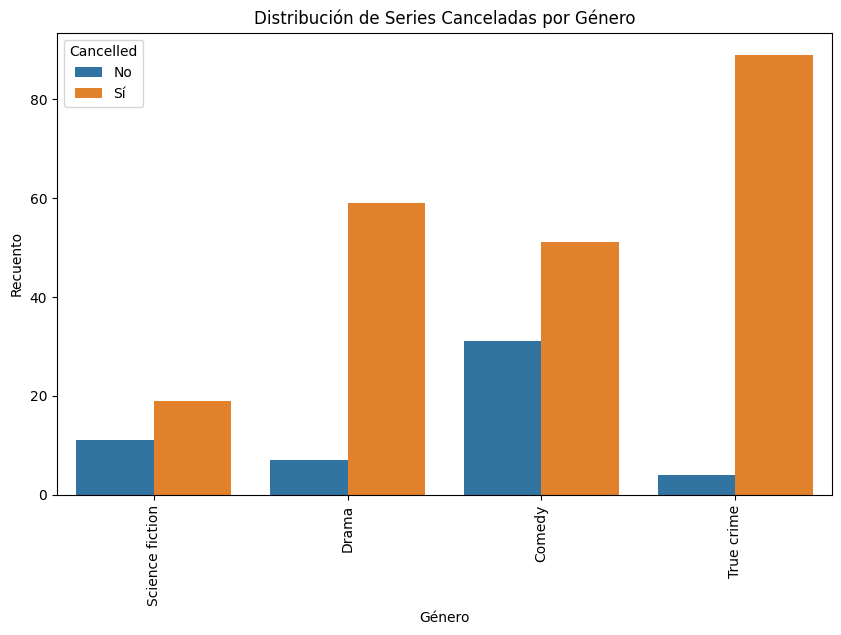

In [6]:
# Selecciona un subconjunto de categorías
categorias_a_mostrar = ['Science fiction', 'Comedy', 'Drama', 'True crime']

# Filtra los datos para incluir solo las categorías seleccionadas
data_filtrada = data[data['Genre'].isin(categorias_a_mostrar)]

plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', hue='Cancelled', data=data_filtrada)
plt.xlabel('Género')
plt.ylabel('Recuento')
plt.title('Distribución de Series Canceladas por Género')
plt.xticks(rotation=90)  # Para mejorar la legibilidad de las etiquetas
plt.legend(title='Cancelled', labels=['No', 'Sí'])
plt.show()


Eje X (Género): En el eje horizontal, se encuentran las categorías de género de las series de televisión, que incluyen 'Science fiction', 'Comedy', 'Drama' y 'True crime'. Estas son las categorías seleccionadas para el análisis.

Eje Y (Recuento): En el eje vertical, se muestra el recuento de series de televisión en cada categoría de género. Cuanto mayor sea la altura de la barra, mayor será el número de series en ese género.

Barras Apiladas: Cada barra en el gráfico representa una categoría de género, y está dividida en dos secciones apiladas. Las barras de color naranja muestran el número de series canceladas ('Cancelled' = 'Sí'), y las barras de color azul muestran el número de series no canceladas ('Cancelled' = 'No') en esa categoría de género.


Análisis de Resultados:

Distribución por Género: El gráfico muestra cómo se distribuyen las series canceladas y no canceladas en las diferentes categorías de género. Por ejemplo, en la categoría 'Science fiction', la barra superior es más pequeña que la barra inferior, lo que indica que hay más series no canceladas en esta categoría. En otras palabras, 'Science fiction' tiene un mayor número de series que no han sido canceladas.

Comparación de Cancelación por Género: En 'Comedy', las barras están casi a la misma altura, lo que sugiere que hay una distribución equitativa de series canceladas y no canceladas en esta categoría.

Tendencias: Dentro de las categorías analizadas, se puede observar que las series de genero "True Crime" son las que tienden a ser canceladas más amenudo.

Gráfico de Tendendias de Programas nuevos por Año

Text(0.5, 1.0, 'Tendencia de Programas por Año')

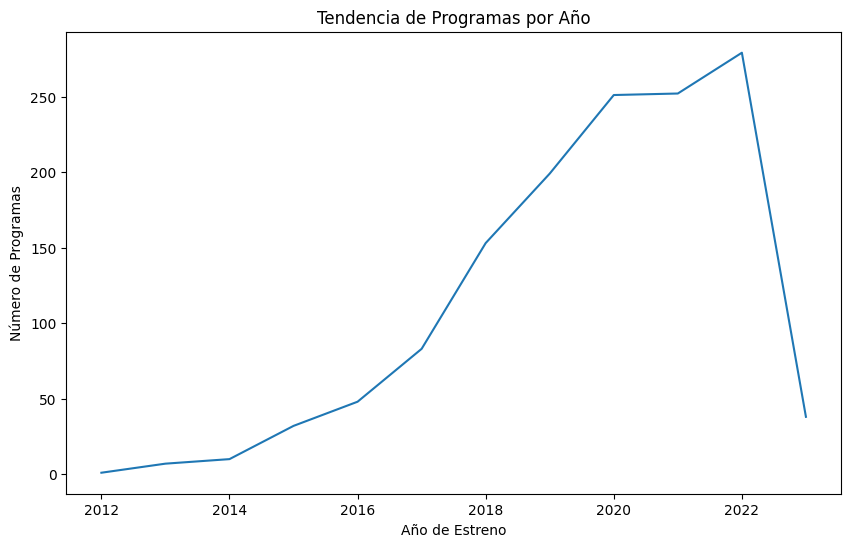

In [8]:
data['Premiere Date'] = pd.to_datetime(data['Premiere Date'])
time_series = data.groupby(data['Premiere Date'].dt.year)['Title'].count()
time_series.plot(kind='line', figsize=(10, 6))
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Programas')
plt.title('Tendencia de Programas por Año')


Eje X (Año de Estreno): En el eje horizontal, se muestran los años de estreno de los programas de televisión.

Eje Y (Número de Programas): En el eje vertical, se muestra el número de programas de televisión que se estrenaron en un año en particular.

Línea de Tendencia: La línea en el gráfico conecta los puntos que representan cada año de estreno. La pendiente y la forma de la línea de tendencia indican la dirección de la tendencia a lo largo de los años.

Análisis de Resultados:

Tendencia a lo largo del Tiempo: Para el año 2018 y antes del 2022 se pueden observar picos en el número de programas estrenados. Además, se puede observar que hubo una tendencia en el aumento de número de programas estrenados por año desde el 2012 hasta antes del 2020.

Picos y Valles: LSe puede observar que existio un "valle" en el aumento de número de programas nuevos durante el 2020. Esto se debe principalmente a la pandemia.

Limpieza de Datos

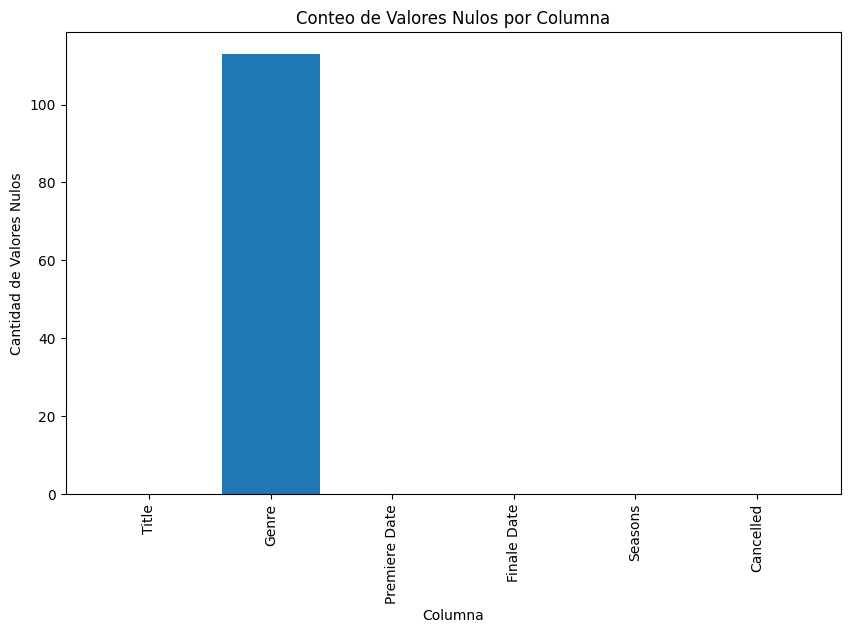

In [71]:

import matplotlib.pyplot as plt

# Creación un diccionario para almacenar el conteo de valores nulos por columna
conteo_nulos_por_columna = {}

# Iteraración a través de las columnas del DataFrame
for columna in data.columns:
    conteo_nulos = data[columna].isnull().sum()
    conteo_nulos_por_columna[columna] = conteo_nulos

# Visualización de los valores nulos en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_nulos_por_columna.keys(), conteo_nulos_por_columna.values())
plt.title('Conteo de Valores Nulos por Columna')
plt.xlabel('Columna')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=90)  # Rotar los nombres de las columnas en el eje x para una mejor legibilidad
plt.show()


In [72]:
#Llenado de los valores nulos de la columna Genre con la palabra Unknown
data['Genre'] = data['Genre'].fillna('Unknown')

null_finale_date_rows = data[data['Genre'].notnull()]

# Mostrando las filas que tienen el Genre unknown
data[data['Genre'] == 'Unknown']


,Title,Genre,Premiere Date,Finale Date,Seasons,Cancelled
302,All Hail King Julien,Unknown,"December 19, 2014","December 1, 2017",5,0
303,Ever After High,Unknown,"February 6, 2015","August 5, 2016",5,0
304,Dragons: Race to the Edge,Unknown,"June 26, 2015","February 16, 2018",6,0
305,Popples,Unknown,"October 30, 2015","July 24, 2016",3,0
306,Care Bears and Cousins,Unknown,"November 6, 2015","February 5, 2016",2,0
...,...,...,...,...,...,...
1330,VeggieTales in the City,Unknown,"February 24, 2017","September 15, 2017",2,0
1331,Spirit Riding Free,Unknown,"May 5, 2017","April 5, 2019",8,0
1332,Dinotrux Supercharged,Unknown,"November 10, 2017","August 3, 2018",3,0
1333,Ask the StoryBotsKorea Edition,Unknown,"May 5, 2021","May 5, 2021",1,1


La técnica de llenado de valores nulos se utiliza en este dataset para manejar los valores faltantes en la columna "Genre" (género de los programas de televisión).

El llenado de valores nulos en esta columna específica con la palabra "Unknown" se utiliza para asignar una categoría temporal a los programas que no tienen un género registrado. Esta decisión se basa en la premisa de que es preferible tener una etiqueta categórica en lugar de un valor nulo, ya que muchos algoritmos de aprendizaje automático requieren que todas las características tengan valores válidos para su funcionamiento. Al llenar los valores nulos con "Unknown," se crea una categoría ficticia que representa la falta de información sobre el género de un programa.

El resultado de esta operación es que se asigna el valor "Unknown" a los programas que inicialmente tenían valores nulos en la columna "Genre." Esto permite mantener esos programas en el conjunto de datos y utilizarlos en análisis posteriores sin tener que eliminarlos debido a valores faltantes.

Modelado

Submuestreo utilizando la técnica de SMOTE

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE  
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Codificación One-Hot para variables categóricas
encoder = OneHotEncoder(drop='first')  # drop='first' para evitar la multicolinealidad
genre_encoded = encoder.fit_transform(data[['Genre']]).toarray()
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Genre']))

# Concatenar con el conjunto de datos original y eliminar la columna categórica original
data = pd.concat([data, genre_encoded_df], axis=1).drop(columns=['Genre', 'Title', 'Premiere Date', 'Finale Date'])  # eliminamos las columnas que no necesitamos

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data.drop(columns=['Cancelled'])
y = data['Cancelled']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # ajusta test_size según tus necesidades

# Aplicar SMOTE para manejar el desequilibrio de clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


La razón detrás de la aplicación de SMOTE en la realización del submuestreo del dataset es abordar el desequilibrio de clases en el conjunto de datos. Dado que el objetivo es predecir si un programa de televisión ha sido cancelado o no (columna "Cancelled"), es común que haya menos ejemplos de programas cancelados (etiqueta 1) en comparación con los no cancelados (etiqueta 0). Al aplicar SMOTE, se generan ejemplos sintéticos de programas cancelados para igualar la cantidad de ejemplos en ambas clases, lo que mejora el rendimiento de los modelos de clasificación.

Algoritmos Supervisados

Random Forest

In [11]:
# Algoritmos supervisados
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.99      1.00      1.00       207

    accuracy                           0.99       271
   macro avg       1.00      0.98      0.99       271
weighted avg       0.99      0.99      0.99       271



SVM

In [12]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train_smote, y_train_smote)
y_pred_svm = svm.predict(X_test)
print("SVM:")
print(classification_report(y_test, y_pred_svm))

SVM:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.99      1.00      1.00       207

    accuracy                           0.99       271
   macro avg       1.00      0.98      0.99       271
weighted avg       0.99      0.99      0.99       271



KNN

In [13]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test)
print("KNN:")
print(classification_report(y_test, y_pred_knn))

KNN:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71        64
           1       0.98      0.78      0.87       207

    accuracy                           0.82       271
   macro avg       0.77      0.86      0.79       271
weighted avg       0.88      0.82      0.83       271



In [ ]:
Algoritmos No Supervisados (KMeans)

In [14]:
# Creación una instancia de KMeans con el número de clústeres apropiado
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

# Ajustar el modelo K-Means a tus datos
kmeans.fit(X)

# Obtener las asignaciones de clúster para cada punto de datos
cluster_assignments = kmeans.labels_

# Agregar las asignaciones de clúster al DataFrame 'data'
data['Cluster'] = cluster_assignments

#Visualizar los resultados del clustering en una matriz de correlación
data.groupby('Cluster').mean().corr()



,Seasons,Cancelled,Genre_Action comedy,Genre_Action drama,Genre_Action horror,Genre_Action-adventure,Genre_Actiondrama,Genre_Aftershow,Genre_Aftershow/Interview,Genre_Animation,...,Genre_War drama,Genre_Western,Genre_Workplace comedy,Genre_Workplace comedy/Science fiction,Genre_Workplacedramedy,Genre_Young adultcrime comedy,Genre_Young adultmysterydrama,Genre_Yule log,Genre_Zombie horror,Genre_nan
Seasons,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
Cancelled,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
Genre_Action comedy,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
Genre_Action drama,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
Genre_Action horror,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Genre_Young adultcrime comedy,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
Genre_Young adultmysterydrama,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
Genre_Yule log,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
Genre_Zombie horror,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0


Hiper parámetros

In [15]:
# Ajuste de hiperparámetros (usando Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)
best_grid = grid_search.best_estimator_

y_pred_best_grid = best_grid.predict(X_test)
print("Random Forest con ajuste de hiperparámetros:")
print(classification_report(y_test, y_pred_best_grid))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest con ajuste de hiperparámetros:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.99      1.00      1.00       207

    accuracy                           0.99       271
   macro avg       1.00      0.98      0.99       271
weighted avg       0.99      0.99      0.99       271



Conclusiones

Análisis de Resultados:

Random Forest:

El modelo Random Forest muestra un excelente rendimiento en términos de precisión, recall y puntuación F1 tanto para la Clase 0 (no cancelado) como para la Clase 1 (cancelado).
El modelo tiene una alta precisión global del 99%, lo que indica su capacidad para clasificar correctamente la cancelación y no cancelación de programas de televisión.

SVM (Support Vector Machine):
Al igual que Random Forest, el modelo SVM tiene un rendimiento excepcional con alta precisión, recall y puntuación F1 para ambas clases.
También muestra una precisión global del 99%.

KNN (K-Nearest Neighbors):
El modelo KNN muestra una precisión más baja para la Clase 0 (no cancelado) en comparación con Random Forest y SVM.
Tiene un recall más alto para la Clase 1 (cancelado), lo que significa que es mejor para identificar programas cancelados.
La precisión global del modelo es del 82%, que es la más baja entre los modelos evaluados.

Por ende, tanto el modelo "Random Forest" como el modelo "SVM" mostraron un rendimiento excepcional con una precisión global del 99%. Ambos modelos lograron una alta precisión, recall y puntuación F1 tanto para la Clase 0 (no cancelado) como para la Clase 1 (cancelado). Dado que ambos modelos tuvieron resultados prácticamente idénticos, no se puede afirmar de manera concluyente cuál es mejor.

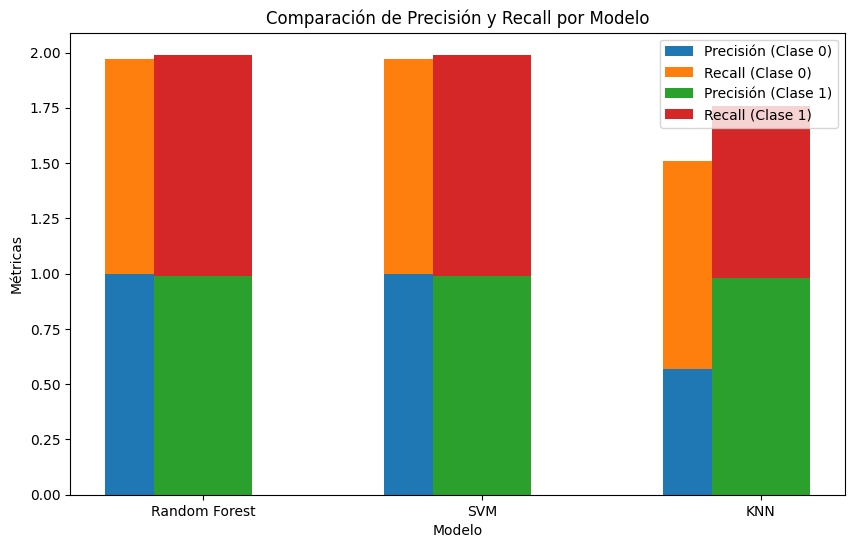

In [6]:
import matplotlib.pyplot as plt

# Resultados de los modelos
model_names = ['Random Forest', 'SVM', 'KNN']
precision_class_0 = [1.00, 1.00, 0.57]
recall_class_0 = [0.97, 0.97, 0.94]
precision_class_1 = [0.99, 0.99, 0.98]
recall_class_1 = [1.00, 1.00, 0.78]

# Crear gráficos de barras para precisión y recall
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(model_names))

plt.bar(index, precision_class_0, bar_width, label='Precisión (Clase 0)')
plt.bar(index, recall_class_0, bar_width, label='Recall (Clase 0)', bottom=precision_class_0)

plt.bar(index, precision_class_1, bar_width, label='Precisión (Clase 1)', align='edge')
plt.bar(index, recall_class_1, bar_width, label='Recall (Clase 1)', align='edge', bottom=precision_class_1)

plt.xlabel('Modelo')
plt.ylabel('Métricas')
plt.title('Comparación de Precisión y Recall por Modelo')
plt.xticks([i + bar_width / 2 for i in index], model_names)
plt.legend()
plt.show()